In [1]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

2023-10-11 19:45:20.444331: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-11 19:45:21.615249: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import tensorflow as tf
print("Device:", tf.test.gpu_device_name())


Device: 


2023-10-11 19:45:23.126992: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-10-11 19:45:23.127044: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: nskv-paviliion
2023-10-11 19:45:23.127057: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: nskv-paviliion
2023-10-11 19:45:23.127213: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 530.41.3
2023-10-11 19:45:23.127244: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 530.41.3
2023-10-11 19:45:23.127254: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 530.41.3


In [3]:
# Setting the path to our data
train_data_dir = './Ultrasonic_weld_v1/train/'
validation_data_dir = './Ultrasonic_weld_v1/valid/'
test_data_dir = "./Ultrasonic_weld_v1/test/"

In [4]:
# Setting the image and batch size
img_width, img_height = 224, 224
batch_size = 10

In [5]:

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Only rescaling for validation set
val_datagen = ImageDataGenerator(rescale=1./255)

# Only rescaling for testing set
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training and validation datasets
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(validation_data_dir,
                                                      target_size=(img_width, img_height),
                                                      batch_size=batch_size,
                                                      class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                      target_size=(img_width, img_height),
                                                      batch_size=batch_size,
                                                      class_mode='categorical')



Found 420 images belonging to 4 classes.
Found 100 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [6]:
# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
conv1_output = model.layers[-1].output
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))


In [7]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# model fitting
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=epochs,validation_data=validation_generator)

Epoch 1/10


2023-10-11 19:45:24.269725: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


42/42 [==============================] - ETA: 0s - loss: 1.3439 - accuracy: 0.3667

2023-10-11 19:46:05.119013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


42/42 [==============================] - 46s 1s/step - loss: 1.3439 - accuracy: 0.3667 - val_loss: 0.6491 - val_accuracy: 0.8400
Epoch 2/10
42/42 [==============================] - 39s 918ms/step - loss: 0.6267 - accuracy: 0.8048 - val_loss: 0.5735 - val_accuracy: 0.8600
Epoch 3/10
42/42 [==============================] - 44s 1s/step - loss: 0.4539 - accuracy: 0.8548 - val_loss: 0.3621 - val_accuracy: 0.9200
Epoch 4/10
42/42 [==============================] - 41s 963ms/step - loss: 0.3019 - accuracy: 0.9095 - val_loss: 0.2216 - val_accuracy: 0.9300
Epoch 5/10
42/42 [==============================] - 40s 951ms/step - loss: 0.2286 - accuracy: 0.9333 - val_loss: 0.5126 - val_accuracy: 0.8900
Epoch 6/10
42/42 [==============================] - 42s 1s/step - loss: 0.1983 - accuracy: 0.9405 - val_loss: 0.1146 - val_accuracy: 0.9400
Epoch 7/10
42/42 [==============================] - 39s 919ms/step - loss: 0.1431 - accuracy: 0.9595 - val_loss: 0.0279 - val_accuracy: 0.9900
Epoch 8/10
42/42 [=

In [9]:
# Evaluate the model on the testing set
test_loss, test_acc  = model.evaluate(test_generator)
print(f'Test_accuracy:{test_acc}')
print(f'Test_loss:{test_loss}')

# Make predictions on the test set / predections gives us the categoury/ class for which our data/ image belongs to/ givest he classification probabilitiees
predictions = model.predict(test_generator)

2023-10-11 19:52:08.889452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - 4s 485ms/step - loss: 0.3056 - accuracy: 0.9125
Test_accuracy:0.9125000238418579
Test_loss:0.3056197762489319


2023-10-11 19:52:13.290069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - 4s 483ms/step


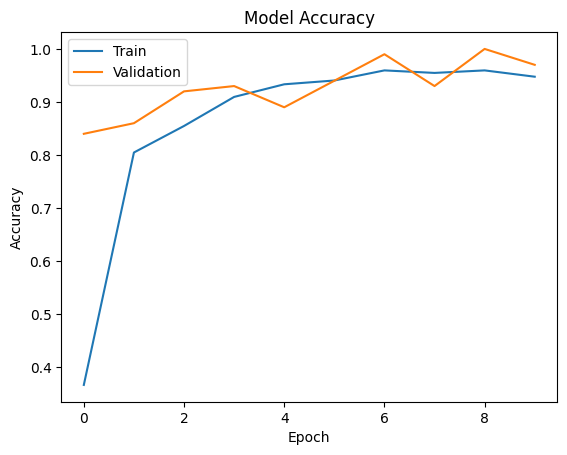

In [10]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
#saving model
from keras.models import load_model

# Save the model
model.save('Ultrasonic_welding_IPDL.h5')

# # Load the model
model1 = load_model('./Ultrasonic_welding_IPDL.h5')


In [15]:
#predection on random images
from PIL import Image
import os

# Define the classes
classes = ['dent', 'good', 'overextrusion', 'scratch']

# Set the path to the image dataset
image_path = './test_predect/'

# Loop through the images in the dataset
for file in os.listdir(image_path):
    # Load the image
    img = Image.open(os.path.join(image_path, file)).resize((224, 224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    
    # Make a prediction
    prediction = model1.predict(img)

    
    # Get the label of the predicted class
    label = classes[np.argmax(prediction)]
    
    # Print the prediction along with the label
    print(f"Prediction: {prediction}, Label: {label}")

1/1 [==============================] - 0s 75ms/step
Prediction: [[4.5498986e-05 9.9925488e-01 4.6924168e-05 6.5268530e-04]], Label: good
1/1 [==============================] - 0s 29ms/step
Prediction: [[1.7515922e-05 9.9945360e-01 1.0047987e-04 4.2845763e-04]], Label: good
1/1 [==============================] - 0s 27ms/step
Prediction: [[0.03614109 0.17117839 0.03143613 0.7612444 ]], Label: scratch
1/1 [==============================] - 0s 31ms/step
Prediction: [[1.0000000e+00 8.6389225e-09 1.0313093e-10 2.6491884e-10]], Label: dent
1/1 [==============================] - 0s 33ms/step
Prediction: [[9.9960381e-01 6.2367234e-10 1.5134153e-06 3.9468828e-04]], Label: dent
1/1 [==============================] - 0s 29ms/step
Prediction: [[9.208466e-09 2.597610e-07 9.999856e-01 1.421573e-05]], Label: overextrusion
1/1 [==============================] - 0s 33ms/step
Prediction: [[4.3470664e-07 5.3012432e-06 9.9966955e-01 3.2477474e-04]], Label: overextrusion
1/1 [==============================]

1/1 [==============================] - 0s 26ms/step
GOOD_3.jpg - Prediction: good, True Label: good
1/1 [==============================] - 0s 30ms/step
GOOD_2.jpg - Prediction: good, True Label: good
1/1 [==============================] - 0s 30ms/step
scratch_3.jpg - Prediction: scratch, True Label: scratch
1/1 [==============================] - 0s 28ms/step
Dent_3.jpg - Prediction: dent, True Label: dent
1/1 [==============================] - 0s 32ms/step
Dent_1.jpg - Prediction: dent, True Label: dent
1/1 [==============================] - 0s 31ms/step
overextrusion_1.jpg - Prediction: overextrusion, True Label: overextrusion
1/1 [==============================] - 0s 29ms/step
overextrusion_3.jpg - Prediction: overextrusion, True Label: overextrusion
1/1 [==============================] - 0s 28ms/step
scratch_1.jpg - Prediction: scratch, True Label: scratch


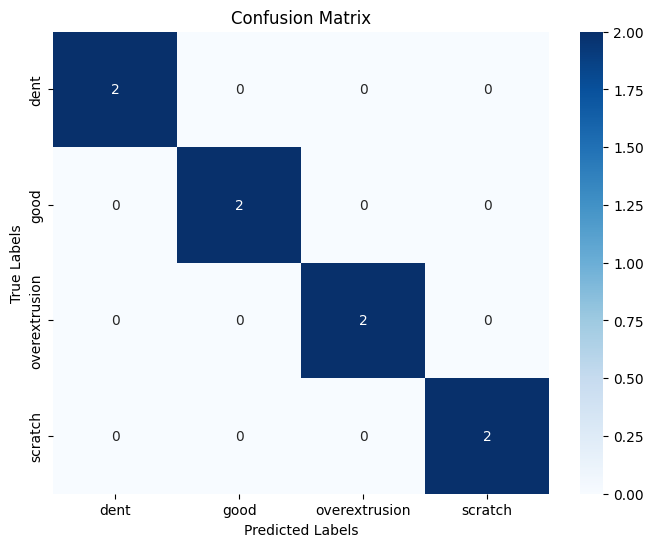

In [16]:
import os
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the classes
classes = ['dent', 'good', 'overextrusion', 'scratch']

# Set the path to the image dataset
image_path = './test_predect/'

# Initialize an empty list to store predictions and true labels
all_predictions = []
all_true_labels = []

# Loop through the images in the dataset
for file in os.listdir(image_path):
    # Load the image
    img = Image.open(os.path.join(image_path, file)).resize((224, 224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    
    # Make a prediction
    prediction = model1.predict(img)
    
    # Get the label of the predicted class
    predicted_label = classes[np.argmax(prediction)]
    
    # Extract the true label from the filename (modify the parsing if needed)
    true_label = file.split('_')[0].lower()  # Assuming the filename contains the true label before an underscore
    
    # Check if the true label is valid (exists in classes)
    if true_label not in classes:
        print(f"Warning: Invalid true label '{true_label}' for file '{file}'. Skipping this sample.")
    else:
        # Add predictions and true labels to the lists
        all_predictions.append(predicted_label)
        all_true_labels.append(true_label)

        # Print the prediction along with the label
        print(f"{file} - Prediction: {predicted_label}, True Label: {true_label}")

# Create the confusion matrix if there are valid samples
if len(all_predictions) > 0:
    # Create the confusion matrix
    conf_matrix = confusion_matrix(all_true_labels, all_predictions, labels=classes)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("No valid samples found. Check the true labels and filenames.")
